In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Specify the path to your dataset
dataset_path = "C:/Users/h/Downloads/CVPR_Assignment 1/animals/animals/"

# Function to load and preprocess the dataset from a directory
def load_dataset_from_path(dataset_path, image_size=(32, 32)):
    X = []
    y = []
    
    # Iterate over each class folder
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        
        # Only process if it is a directory (i.e., class folder)
        if os.path.isdir(class_folder):
            # Iterate over each image file in the class folder
            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)
                
                # Load the image
                img = cv2.imread(image_path)
                if img is None:
                    continue  # Skip if image could not be loaded
                
                # Convert to grayscale
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                # Resize the image to the target size
                resized_img = cv2.resize(gray_img, image_size)
                
                # Append the image data and the class label
                X.append(resized_img)
                y.append(class_name)
    
    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y


# Load and preprocess the dataset
X, y = load_dataset_from_path(dataset_path)

# Check the shape of the data
print("Dataset loaded. Shape of X:", X.shape)
print("Number of labels:", len(y))

Dataset loaded. Shape of X: (3000, 32, 32)
Number of labels: 3000


In [3]:
# Flatten the images into 1D vectors
X_flat = X.reshape((X.shape[0], -1))

# Encode class labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the shape of the flattened dataset
print("Shape of X_flat:", X_flat.shape)
print("Shape of y_encoded:", y_encoded.shape)


Shape of X_flat: (3000, 1024)
Shape of y_encoded: (3000,)


In [4]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42)

# Check the shapes of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (2400, 1024) (2400,)
Validation set shape: (600, 1024) (600,)


In [5]:
# Function to train and evaluate k-NN model using cross-validation
def evaluate_knn(X, y, distance_metric):
    k_values = range(1, 11)  # We'll try K values from 1 to 10
    accuracy_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
        accuracy_scores.append(np.mean(scores))

    return k_values, accuracy_scores

# Evaluate for Manhattan (L1)
k_values, manhattan_scores = evaluate_knn(X_train, y_train, 'manhattan')

# Evaluate for Euclidean (L2)
_, euclidean_scores = evaluate_knn(X_train, y_train, 'euclidean')


In [11]:
# Print mean accuracy for each K value for both distance metrics
for i, k in enumerate(k_values):
    print(f"Mean accuracy for K={k} (Manhattan): {manhattan_scores[i] * 100:.2f}%")
    print(f"Mean accuracy for K={k} (Euclidean): {euclidean_scores[i] * 100:.2f}%")


Mean accuracy for K=1 (Manhattan): 44.17%
Mean accuracy for K=1 (Euclidean): 38.17%
Mean accuracy for K=2 (Manhattan): 40.50%
Mean accuracy for K=2 (Euclidean): 36.08%
Mean accuracy for K=3 (Manhattan): 44.54%
Mean accuracy for K=3 (Euclidean): 38.08%
Mean accuracy for K=4 (Manhattan): 43.96%
Mean accuracy for K=4 (Euclidean): 37.62%
Mean accuracy for K=5 (Manhattan): 43.08%
Mean accuracy for K=5 (Euclidean): 38.38%
Mean accuracy for K=6 (Manhattan): 44.08%
Mean accuracy for K=6 (Euclidean): 38.17%
Mean accuracy for K=7 (Manhattan): 44.50%
Mean accuracy for K=7 (Euclidean): 38.88%
Mean accuracy for K=8 (Manhattan): 44.71%
Mean accuracy for K=8 (Euclidean): 37.88%
Mean accuracy for K=9 (Manhattan): 45.21%
Mean accuracy for K=9 (Euclidean): 39.46%
Mean accuracy for K=10 (Manhattan): 45.17%
Mean accuracy for K=10 (Euclidean): 37.92%


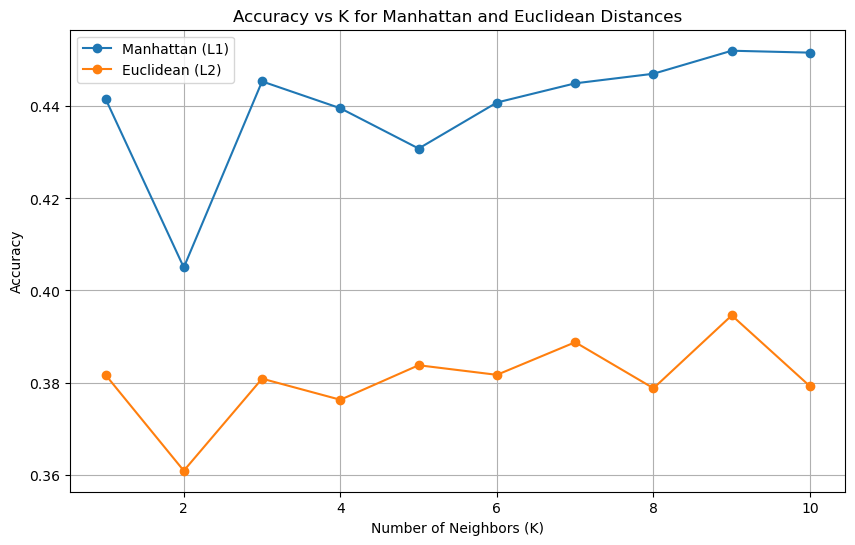

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, manhattan_scores, label='Manhattan (L1)', marker='o')
plt.plot(k_values, euclidean_scores, label='Euclidean (L2)', marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for Manhattan and Euclidean Distances')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Fit the model using the best K value (assuming K=3 for simplicity)
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_best.fit(X_train, y_train)

# Get top 5 predictions on the validation set
y_pred = knn_best.predict(X_val[:5])

# Decode predictions to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
print("Top 5 Predictions:", y_pred_labels)


Top 5 Predictions: ['cats' 'dogs' 'cats' 'cats' 'panda']


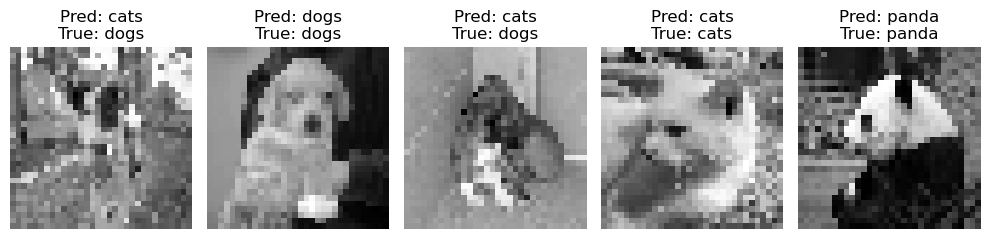

In [8]:
import matplotlib.pyplot as plt

# Display the top 5 predictions along with the images
def display_predictions(images, true_labels, predicted_labels, label_encoder, num_images=5):
    plt.figure(figsize=(10, 5))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        # Display the grayscale image
        plt.imshow(images[i], cmap='gray')
        # Title with predicted and true labels
        plt.title(f"Pred: {label_encoder.inverse_transform([predicted_labels[i]])[0]}\nTrue: {label_encoder.inverse_transform([true_labels[i]])[0]}")
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Get the top 5 predictions on the validation set
num_predictions = 5
y_pred = knn_best.predict(X_val[:num_predictions])

# Display the images with their predicted and true labels
display_predictions(X_val[:num_predictions].reshape((-1, 32, 32)), y_val[:num_predictions], y_pred, label_encoder)
